## Steam Game Analysis

By: Troy Odin

**Overview**

This study is meant to look at the performance of different genres of games and see what effect critic scores have on the popularity of a game. The dataset used is from Kaggle.com and has every game on steams library from 1999 to 2016 with its genre, metacritic score, price and recommendation count.

Link to the Data:

https://www.kaggle.com/datasets/thedevastator/get-your-game-on-metacritic-recommendations-and

**Key Metrics**



*   Metacritic Score
*   Recommendation Count (Metric for Popularity)
*   Initial Price
*   Genre



**Goals**

1. Look at the relationship between metacritic scores and recommendation count
2. Look at the relationship between metacritic score and price



**Hypotheses**

1. H0: There is no significant difference between a games critic score and its popularity

   H1: There is a significant difference between a games critic score and its popularity

2. H0: There is no significant difference between a games critic score and its price

  H1: There is a significant difference between a games critic score and price

**Importing Data**

In [5]:
from sqlalchemy import create_engine
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

In [7]:
import numpy as np
from scipy import stats

In [6]:
df= pd.read_csv("/content/games-features-edit.csv")

**Cleaning Data**

In [ ]:
df.describe()

,Metacritic,RecommendationCount,PriceInitial
count,12624.000000,1.262400e+04,12624.000000
mean,12.955640,1.245043e+03,9.290024
std,28.094054,1.560722e+04,14.164946
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,1.990000
50%,0.000000,0.000000e+00,5.990000
75%,0.000000,2.692500e+02,9.990000
max,96.000000,1.427633e+06,449.990000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12624 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12624 non-null  int64  
 3   RecommendationCount          12624 non-null  int64  
 4   IsFree                       12624 non-null  bool   
 5   GenreIsNonGame               12624 non-null  bool   
 6   GenreIsIndie                 12624 non-null  bool   
 7   GenreIsAction                12624 non-null  bool   
 8   GenreIsAdventure             12624 non-null  bool   
 9   GenreIsCasual                12624 non-null  bool   
 10  GenreIsStrategy              12624 non-null  bool   
 11  GenreIsRPG                   12624 non-null  bool   
 12  GenreIsSimulation            12624 non-null  bool   
 13  GenreIsEarlyAcce

In [ ]:
##removing null values
drop_na=df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12538 entries, 0 to 12623
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12538 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12538 non-null  int64  
 3   RecommendationCount          12538 non-null  int64  
 4   IsFree                       12538 non-null  bool   
 5   GenreIsNonGame               12538 non-null  bool   
 6   GenreIsIndie                 12538 non-null  bool   
 7   GenreIsAction                12538 non-null  bool   
 8   GenreIsAdventure             12538 non-null  bool   
 9   GenreIsCasual                12538 non-null  bool   
 10  GenreIsStrategy              12538 non-null  bool   
 11  GenreIsRPG                   12538 non-null  bool   
 12  GenreIsSimulation            12538 non-null  bool   
 13  GenreIsEarlyAcce

In [ ]:
##removing games with no recommendations and a quality of 0
drop_norecs=df.drop(df[df['RecommendationCount']==0].index, inplace= True)
df.info()

drop_norecs=df.drop(df[df['Metacritic']==0].index, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4846 entries, 0 to 12542
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 4846 non-null   object 
 1   ReleaseDate                  4846 non-null   object 
 2   Metacritic                   4846 non-null   int64  
 3   RecommendationCount          4846 non-null   int64  
 4   IsFree                       4846 non-null   bool   
 5   GenreIsNonGame               4846 non-null   bool   
 6   GenreIsIndie                 4846 non-null   bool   
 7   GenreIsAction                4846 non-null   bool   
 8   GenreIsAdventure             4846 non-null   bool   
 9   GenreIsCasual                4846 non-null   bool   
 10  GenreIsStrategy              4846 non-null   bool   
 11  GenreIsRPG                   4846 non-null   bool   
 12  GenreIsSimulation            4846 non-null   bool   
 13  GenreIsEarlyAcces

In [ ]:
##removing unused columns
df.drop(labels=['IsFree', 'GenreIsNonGame', 'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer'], axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1823 entries, 0 to 12065
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseName         1823 non-null   object 
 1   ReleaseDate          1823 non-null   object 
 2   Metacritic           1823 non-null   int64  
 3   RecommendationCount  1823 non-null   int64  
 4   GenreIsIndie         1823 non-null   bool   
 5   GenreIsAction        1823 non-null   bool   
 6   GenreIsAdventure     1823 non-null   bool   
 7   GenreIsCasual        1823 non-null   bool   
 8   GenreIsStrategy      1823 non-null   bool   
 9   GenreIsRPG           1823 non-null   bool   
 10  GenreIsFreeToPlay    1823 non-null   bool   
 11  PriceInitial         1823 non-null   float64
dtypes: bool(7), float64(1), int64(2), object(2)
memory usage: 97.9+ KB


In [ ]:
df.GenreIsIndie = df.GenreIsIndie.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1823 entries, 0 to 12065
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseName         1823 non-null   object 
 1   ReleaseDate          1823 non-null   object 
 2   Metacritic           1823 non-null   int64  
 3   RecommendationCount  1823 non-null   int64  
 4   GenreIsIndie         1823 non-null   object 
 5   GenreIsAction        1823 non-null   bool   
 6   GenreIsAdventure     1823 non-null   bool   
 7   GenreIsCasual        1823 non-null   bool   
 8   GenreIsStrategy      1823 non-null   bool   
 9   GenreIsRPG           1823 non-null   bool   
 10  GenreIsFreeToPlay    1823 non-null   bool   
 11  PriceInitial         1823 non-null   float64
dtypes: bool(6), float64(1), int64(2), object(3)
memory usage: 110.4+ KB


In [ ]:
##Changing Boolean data to ease analysis
df.GenreIsIndie = df.GenreIsIndie.astype(str)
df.GenreIsAction = df.GenreIsAction.astype(str)
df.GenreIsAdventure = df.GenreIsAdventure.astype(str)
df.GenreIsCasual = df.GenreIsCasual.astype(str)
df.GenreIsStrategy = df.GenreIsStrategy.astype(str)
df.GenreIsRPG = df.GenreIsRPG.astype(str)
df.GenreIsFreeToPlay = df.GenreIsFreeToPlay.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1823 entries, 0 to 12065
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseName         1823 non-null   object 
 1   ReleaseDate          1823 non-null   object 
 2   Metacritic           1823 non-null   int64  
 3   RecommendationCount  1823 non-null   int64  
 4   GenreIsIndie         1823 non-null   object 
 5   GenreIsAction        1823 non-null   object 
 6   GenreIsAdventure     1823 non-null   object 
 7   GenreIsCasual        1823 non-null   object 
 8   GenreIsStrategy      1823 non-null   object 
 9   GenreIsRPG           1823 non-null   object 
 10  GenreIsFreeToPlay    1823 non-null   object 
 11  PriceInitial         1823 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 185.1+ KB


In [ ]:
##Selecting 4 genres for analysis
df['GenreIsAction'].replace(['True'],'Action')
df['GenreIsAction'].value_counts()

True     949
False    874
Name: GenreIsAction, dtype: int64

In [ ]:
df['GenreIsIndie'].replace(['True'],'Indie')
df['GenreIsIndie'].value_counts()

False    999
True     824
Name: GenreIsIndie, dtype: int64

In [ ]:
df['GenreIsAdventure'].replace(['True'],'Adventure')
df['GenreIsAdventure'].value_counts()

False    1235
True      588
Name: GenreIsAdventure, dtype: int64

In [ ]:
df['GenreIsStrategy'].replace(['True'],'Strategy')
df['GenreIsStrategy'].value_counts()

False    1349
True      474
Name: GenreIsStrategy, dtype: int64

In [ ]:
df['RecommendationCount'].describe
pd.set_option('float_format', '{:f}'.format)

**Distribution Plots**

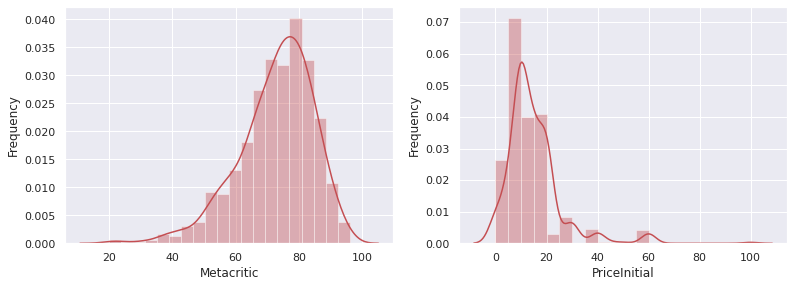

In [ ]:
action_game = df.loc[df['GenreIsAction']=='True']

plt.figure(figsize=(20, 20))

for e, column in enumerate(['Metacritic','PriceInitial',]):
    plt.subplot(4, 3, e + 1)
    sns.distplot(action_game[column],bins=20,color="r")
    plt.ylabel('Frequency')


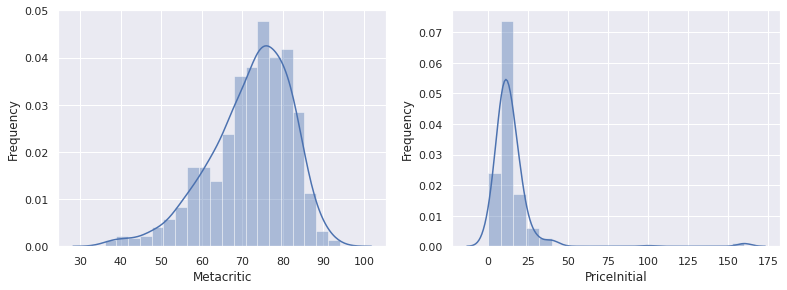

In [ ]:
indie_game = df.loc[df['GenreIsIndie']=='True']

plt.figure(figsize=(20, 20))

for e, column in enumerate(['Metacritic','PriceInitial',]):
    plt.subplot(4, 3, e + 1)
    sns.distplot(indie_game[column],bins=20,color="b")
    plt.ylabel('Frequency')



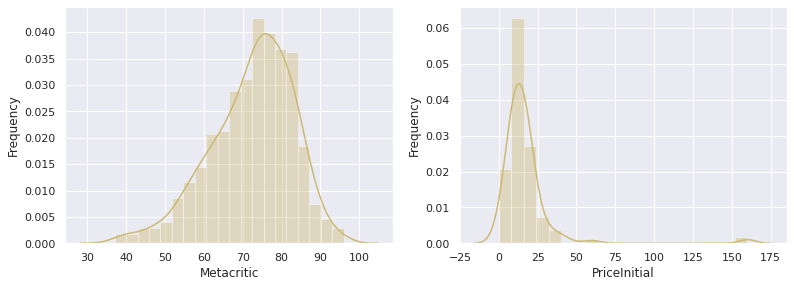

In [ ]:
adventure_game = df.loc[df['GenreIsAdventure']=='True']

plt.figure(figsize=(20, 20))

for e, column in enumerate(['Metacritic', 'PriceInitial',]):
    plt.subplot(4, 3, e + 1)
    sns.distplot(adventure_game[column],bins=20,color="y")
    plt.ylabel('Frequency')

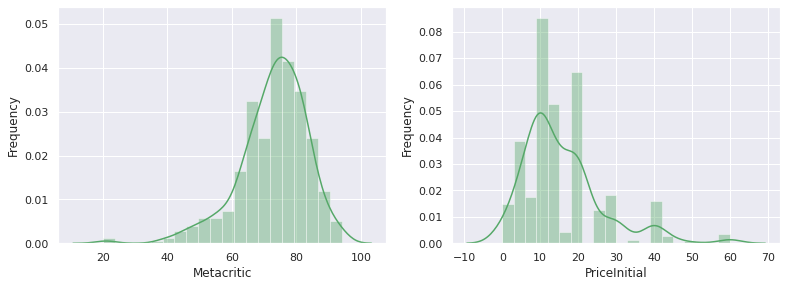

In [ ]:
strategy_game = df.loc[df['GenreIsStrategy']=='True']

plt.figure(figsize=(20, 20))

for e, column in enumerate(['Metacritic', 'PriceInitial',]):
    plt.subplot(4, 3, e + 1)
    sns.distplot(strategy_game[column],bins=20,color="g")
    plt.ylabel('Frequency')

**Observation**

These plots show how many games of 4 genres correlate with each price point and how many games have a specific critic score. Action games and strategy games tend to have lower prices and all genres seem to have a similar distribution in regards to metacritic scores.

**Scatterplot and Correlation**

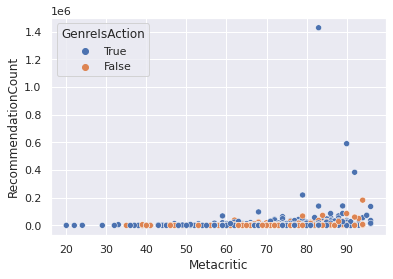

In [ ]:
sns.scatterplot(x="Metacritic", y="RecommendationCount", hue="GenreIsAction", data=df)

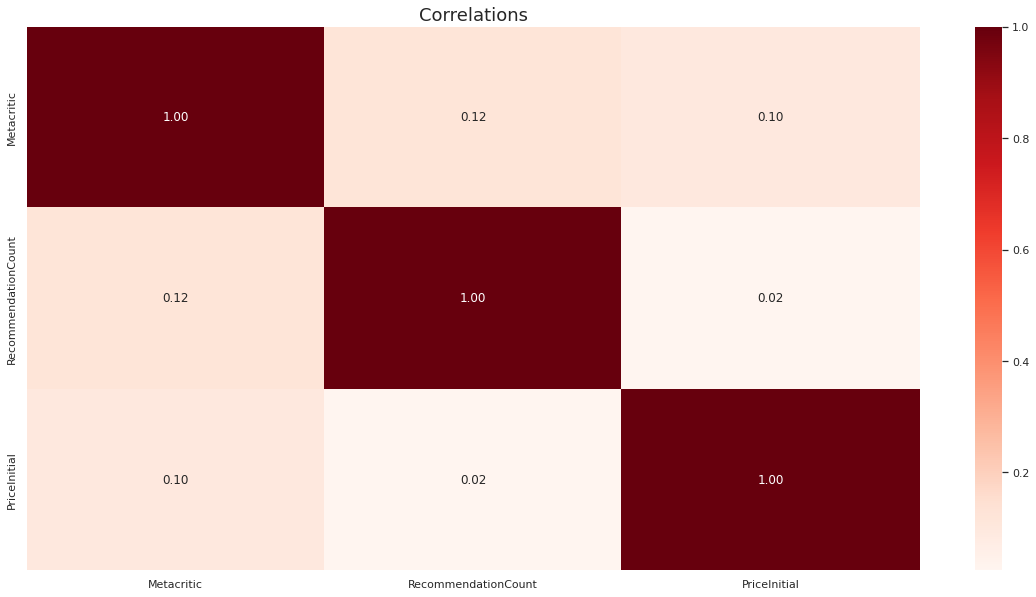

In [ ]:
plt.figure(figsize=(20,10))
cor = action_game.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt = '.2f')
plt.title("Correlations", fontsize = 18)
plt.show()

In [ ]:
df['RecommendationCount'].describe()

count      1823.000000
mean       5728.202414
std       39227.443093
min         101.000000
25%         313.500000
50%         860.000000
75%        3051.500000
max     1427633.000000
Name: RecommendationCount, dtype: float64

**Observation**

This scatterplot shows that action games contain most of the hyper successful games with well above average recommendation count. 

The correlation plot shows a very low level of correlation of recommendation count with critic score with r = .12 

Price and critic score have an even lower correlation with r= .10

In [ ]:
# Defining 95% confidence interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean

    import math
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = abs(mean_difference - margin_of_error)
    ci_upper = abs(mean_difference + margin_of_error)
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [ ]:
## Defining two sample population for t-test
high_criticscore = df.loc[(df['Metacritic'] > df['Metacritic'].mean()).values]

low_criticscore = df.loc[(df['Metacritic'] < df['Metacritic'].mean()).values]

In [ ]:
ttest_recommendation = stats.ttest_ind(high_criticscore['RecommendationCount'], low_criticscore['RecommendationCount'])
s, p = ttest_recommendation
print("Result: ")
if p <= 0.05:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")
    
print(ttest_recommendation)

Result: 
Dependent (reject H0)
Ttest_indResult(statistic=3.7178358684529327, pvalue=0.00020701331351060675)


In [ ]:
ttest_price = stats.ttest_ind(high_criticscore['PriceInitial'], low_criticscore['PriceInitial'])
s, p = ttest_price
print("Result: ")
if p <= 0.05:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")
    
print(ttest_price)

Result: 
Dependent (reject H0)
Ttest_indResult(statistic=5.423213187619945, pvalue=6.635752624821647e-08)


**Observation**

The p value for both tests is well under .05 so we reject both null hypotheses. Critic score has no significant correlation with a games recommendation count or its current price.

# **Conclusion**



*   Action games make up an overwhelming majority of the hyper successful games with extrememly large recommendation counts
*   All games with metacritic scores below 50 have nearly 0 recommendations with few exceptions as demonstrated by the scatterplot
*   Still, the t-tests demonstrate that metacritic score has an insignificant correlation with recommendation count and initial price

